# Homework Pandas

### 1° Task 

In this opportunity, we share with you a DataFrame with the bathymetry and gravity disturbance profile of the island of Oahu in Hawaii.

**Steps:**
1. Load the file.

In [1]:
#importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#cargar archivo
data_file="hawaii-profile.csv"
data = pd.read_csv(data_file)

#verificar carga de archivo
data.head()

,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,13.000000,-165.000000,0.000000,-4.161000,23.008098
1,13.082915,-164.929648,12.070042,-4.747907,21.180807
2,13.165829,-164.859296,24.140085,-5.452608,18.099661
3,13.248744,-164.788945,36.210127,-5.581402,14.372280
4,13.331658,-164.718593,48.280170,-5.438978,10.606283


2. Clean the DataFrame, so check if the DataFrame has:
    * NaN values and remove them.
    * duplicate rows and remove them.
    * any other problems like out of range values and remove them.

In [2]:
#chequeo de dimensiones
sh=data.shape
print(sh)
#chequeo de presencia de NaN
data.isnull().values.any()

(212, 5)


True

In [3]:
#eliminación de NaN
data = data.dropna()
#chequeo de nuevas dimensiones
data.shape

(206, 5)

In [4]:
#chequeo de presencia de valores duplicados
data[data.duplicated()].any()

latitude            True
longitude           True
distance_km         True
topography_km       True
disturbance_mgal    True
dtype: bool

In [5]:
#eliminación de duplicados
data = data.drop_duplicates()
#chequeo de nuevas dimensiones
data.shape

(201, 5)

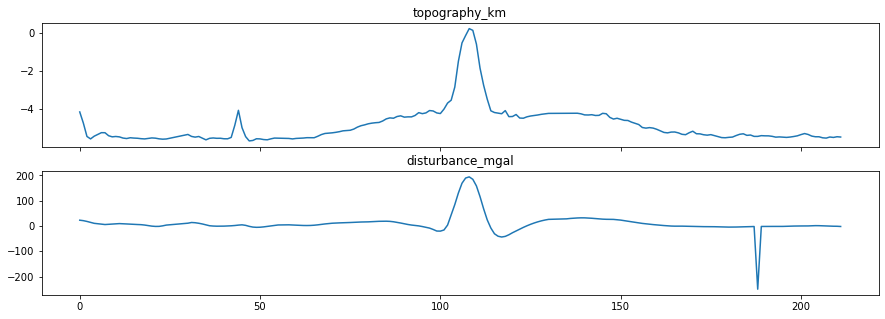

In [6]:
#gráficas exploratorias de columnas de interés para detectar outliers
names = ["distance_km", "topography_km", "disturbance_mgal"]

fig, axes = plt.subplots(2, sharex=True, figsize=(15, 5))

axes[0].plot(data[names[1]])
axes[0].set_title(names[1])

axes[1].plot(data[names[2]])
axes[1].set_title(names[2])

plt.show()

In [7]:
#localización de outlier en la anomalía gravitato
outlier=data[data.disturbance_mgal < -200]
print(outlier)
data.drop(data[data.disturbance_mgal < -200].index, inplace=True)

      latitude  longitude  distance_km  topography_km  disturbance_mgal
188  27.596965 -152.61819  2124.327461       -5.44891       -250.043523


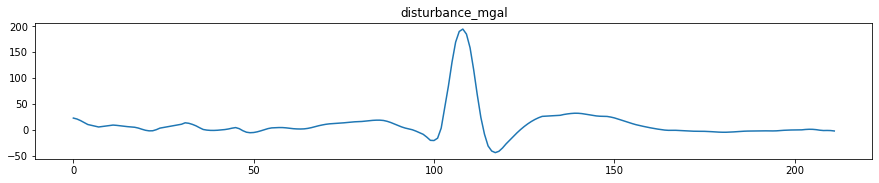

In [8]:
fig, axes = plt.subplots(figsize=(15, 2.5))
plt.plot(data[names[2]])
plt.title(names[2])
plt.show()

3. Plot the _gravity disturbance & distance_ and the _bathimetry & distance_ using `subplot`.
   Make the plot as if you were going to put it in an article. 

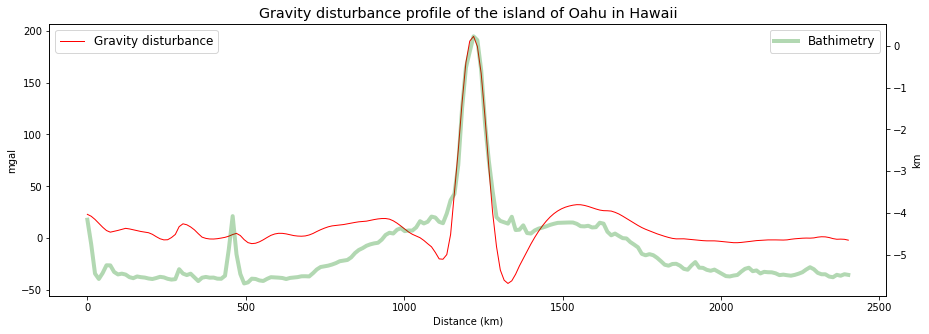

In [68]:
fig, axes = plt.subplots(figsize=(15, 5))

axes.plot(data[names[0]],data[names[2]],'-r', linewidth=1, alpha=1, label="Gravity disturbance")
axes.set_title("Gravity disturbance profile of the island of Oahu in Hawaii",fontsize="x-large")
axes.set(ylabel="mgal",xlabel="Distance (km)")
axes2 = axes.twinx() 
axes2.plot(data[names[0]],data[names[1]],'-g', linewidth=4, label="Bathimetry", alpha=0.3)
axes2.set(ylabel="km")
axes2.set_label("topo")
axes.legend(loc="upper left",fontsize="large")
axes2.legend(fontsize="large")

#axes[1].plot(data[names[0]],data[names[2]])
#axes[1].set_title("Gravity disturbance")
#axes[1].set(ylabel="mgal",xlabel="Distance (km)")

plt.show()